In [61]:
import pandas as pd

filepath = './data/consumption_temp.csv'
df = pd.read_csv(filepath)

display(df.head())

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


In [62]:
# Convert 'time' to Pandas Timestamp
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop(columns=['time'])

# Remove all 'helsingfors' rows from the `location` column
df = df[df['location'] != 'helsingfors']
print("Number of rows with 'helsingfors' location: ", df[df['location'] == 'helsingfors'].shape[0])

# Write the dataframe to a new CSV file
df.to_csv('./data/aneo.csv', index=False)
display(df.head())

Number of rows with 'helsingfors' location:  0


,location,consumption,temperature,timestamp,item_id
0,bergen,1.113325,-0.3,2022-04-07 21:00:00,bergen
1,oslo,4.092830,1.0,2022-04-07 21:00:00,oslo
2,stavanger,2.057858,1.3,2022-04-07 21:00:00,stavanger
3,tromsø,1.246582,-3.9,2022-04-07 21:00:00,tromsø
4,trondheim,1.970098,-2.8,2022-04-07 21:00:00,trondheim


## Data exploration and visualization

### Visualize seasonality in the consumption

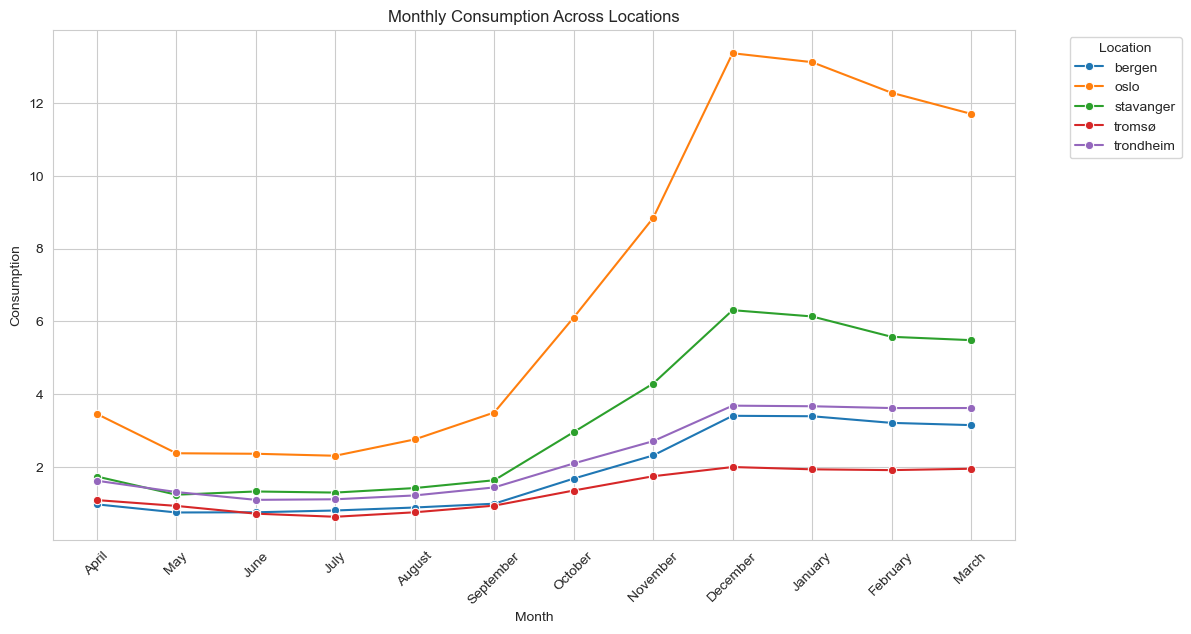

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Extracting month from the 'timestamp' column and creating a new column 'month'
# Note: For a precise analysis, you would need a dataset that spans multiple years
df['month'] = df['timestamp'].dt.month_name()

# Sorting values by 'timestamp' to ensure the line plot is ordered correctly
df = df.sort_values('timestamp')

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for consumption
sns.lineplot(data=df, x='month', y='consumption', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Consumption Across Locations')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


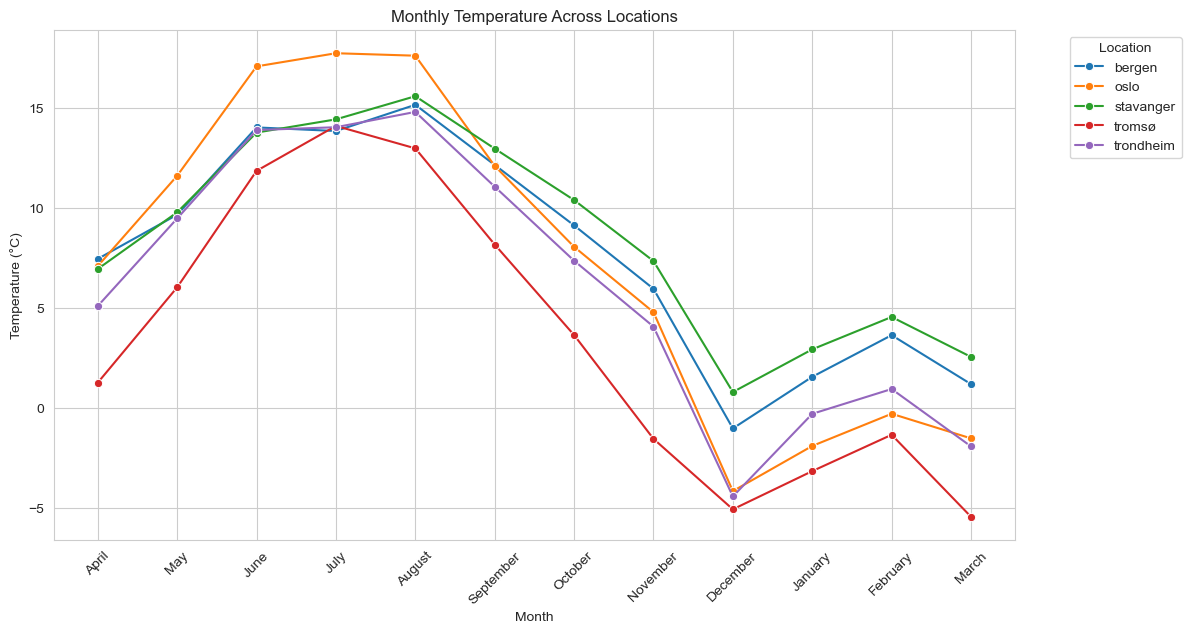

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for temperature
sns.lineplot(data=df, x='month', y='temperature', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Temperature Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Scatter plots to visualize the relationship between consumption and temperature

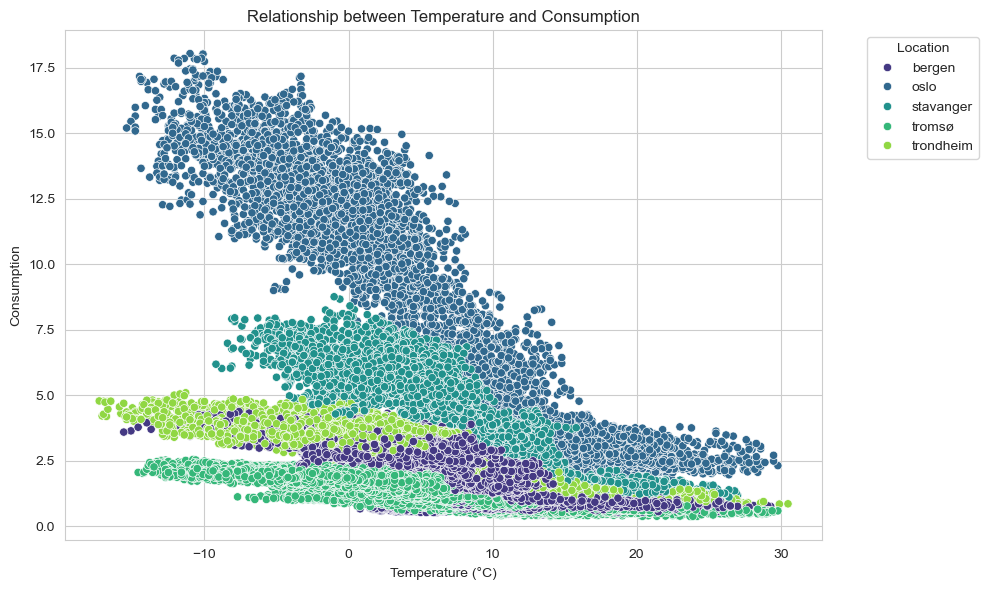

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='temperature', y='consumption', hue='location', palette='viridis')

# Title and labels
plt.title('Relationship between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In the visualization above, it seems there are some outliers for Helsingfors where consumption is 0. Perhaps this correlates the the time period where Helsingfors in missing data.

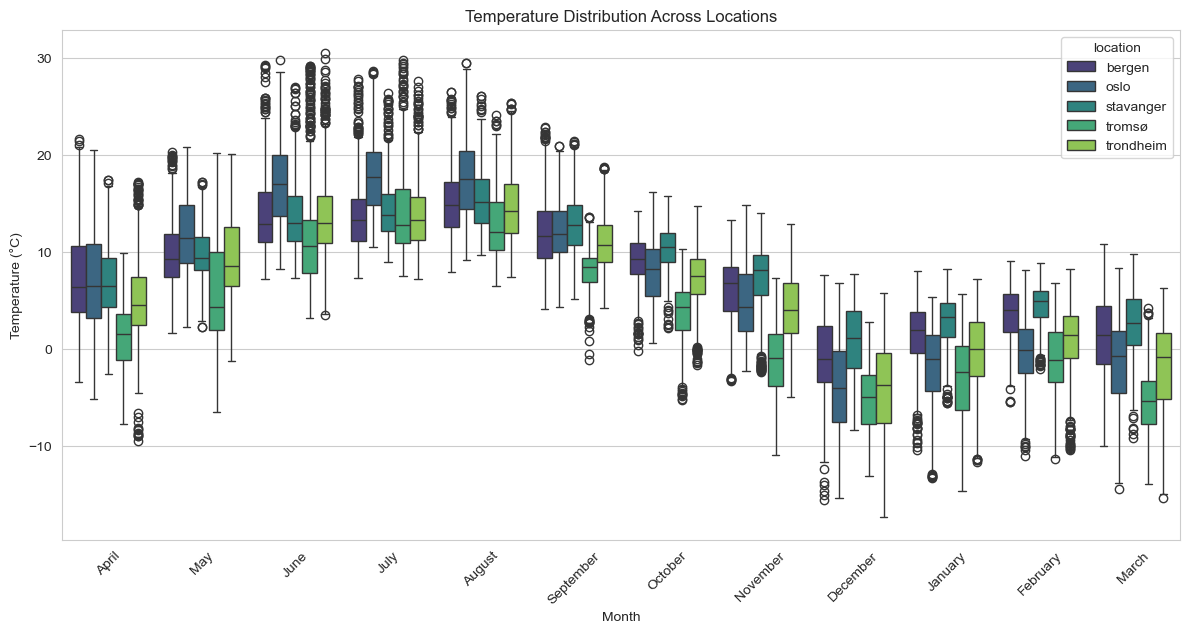

In [68]:
# Visualize temperature each month for each location
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(data=df, x='month', y='temperature', hue='location', palette='viridis')

# Title and labels
plt.title('Temperature Distribution Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



### Correlation Analysis: Check if there's a correlation between energy consumption and temperature.

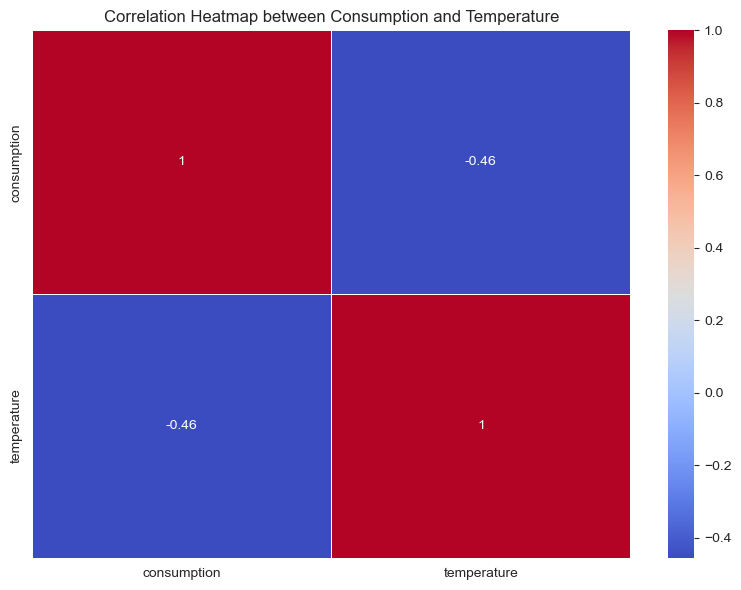

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['consumption', 'temperature']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Title
plt.title('Correlation Heatmap between Consumption and Temperature')

# Show plot
plt.tight_layout()
plt.show()


- **1 (Upper Left)**: This is the correlation of consumption with itself, always 1.
- **1 (Lower Right)**: This is the correlation of temperature with itself, always 1.
- **-0.44 (Upper Right and Lower Left)**: A correlation coefficient of `−0.44`. `−0.44` suggests a moderate negative linear relationship between consumption and temperature. This means that **as temperature increases, consumption tends to decrease (and vice-versa)**. However, the relationship is not very strong since `−0.44` is somewhat distant from `−1`.

Do keep in mind that correlation does not imply causation. While there's a correlation between these two variables, it doesn't necessarily mean that changes in temperature cause changes in consumption. Other factors might be at play, or the observed relationship might be coincidental.

### Boxplots to visualize the distribution of consumption and temperature across different locations.

/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_31663/1980300686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_31663/1980300686.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")


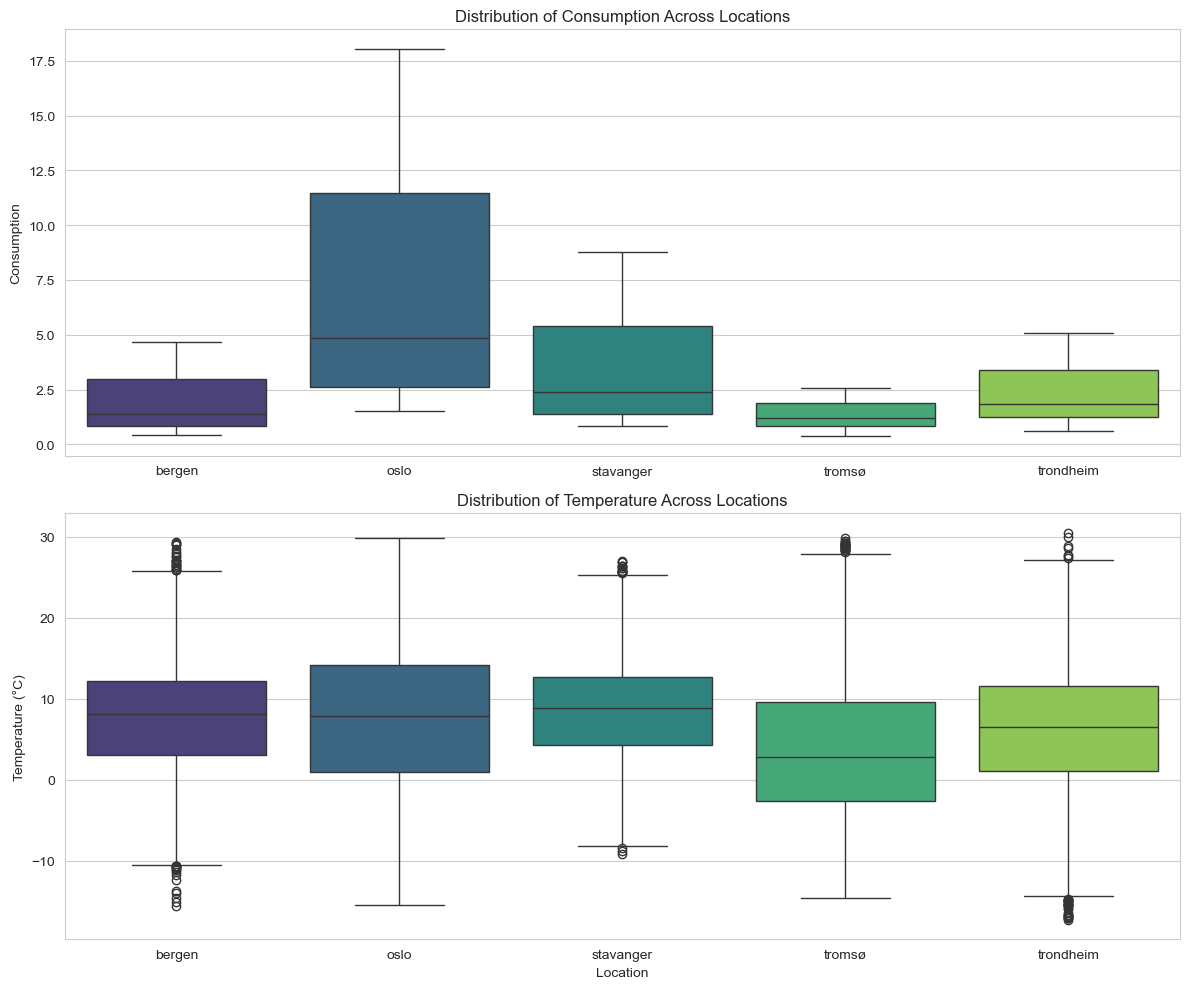

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Create a boxplot for the distribution of consumption across different locations
sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
ax[0].set_title('Distribution of Consumption Across Locations')
ax[0].set_ylabel('Consumption')
ax[0].set_xlabel('')

# Create a boxplot for the distribution of temperature across different locations
sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")
ax[1].set_title('Distribution of Temperature Across Locations')
ax[1].set_ylabel('Temperature (°C)')
ax[1].set_xlabel('Location')

# Adjust and show plot
plt.tight_layout()
plt.show()


### Histograms: To understand the distribution of numerical data like consumption and temperature

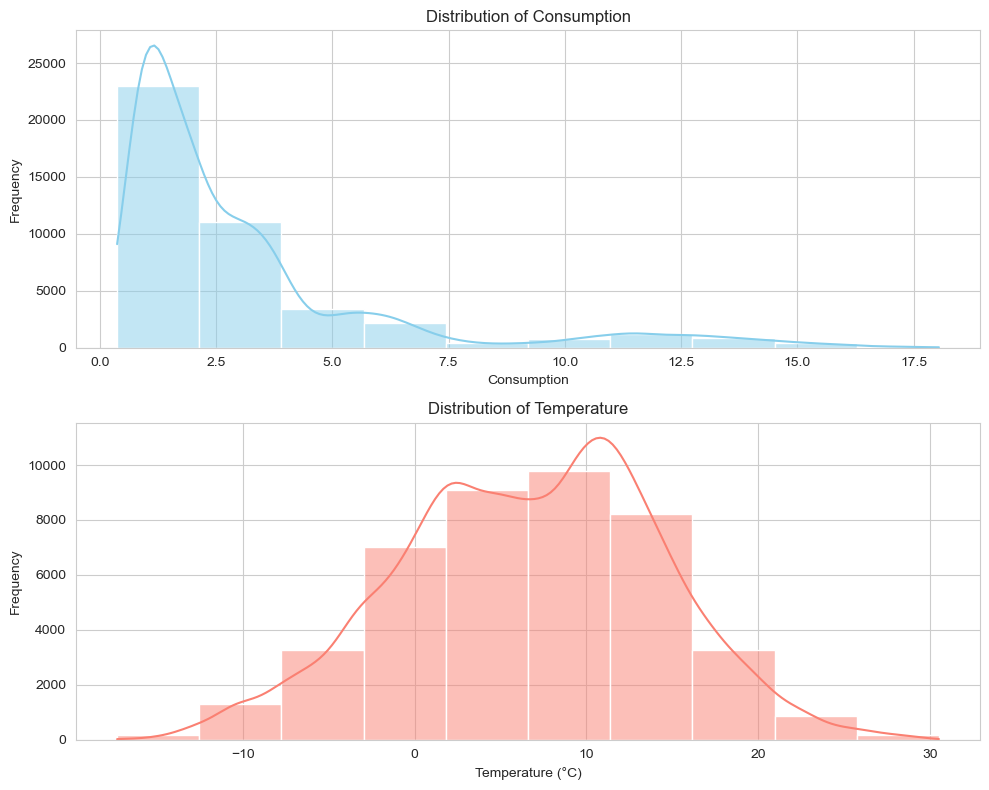

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for consumption
sns.histplot(data=df, x='consumption', bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption')
ax[0].set_ylabel('Frequency')

# Histogram for temperature
sns.histplot(data=df, x='temperature', bins=10, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

# Adjust and show plot
plt.tight_layout()
plt.show()


Basic Statistics for Consumption


count    43205.000000
mean         3.135439
std          3.124147
min          0.372637
25%          1.170724
50%          2.012061
75%          3.595580
max         18.045011
Name: consumption, dtype: float64


Basic Statistics for Temperature


count    43205.000000
mean         6.683731
std          7.627260
min        -17.299999
25%          1.400000
50%          7.000000
75%         12.100000
max         30.500000
Name: temperature, dtype: float64


Grouped Statistics for Consumption by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,1.876716,1.156034,0.443192,0.834003,1.380962,2.998324,4.650816
oslo,8641.0,6.876428,4.672634,1.520560,2.610569,4.871180,11.458471,18.045011
stavanger,8641.0,3.304703,2.112962,0.832372,1.382764,2.390667,5.398822,8.763147
tromsø,8641.0,1.340776,0.559151,0.372637,0.831883,1.195308,1.874898,2.552159
trondheim,8641.0,2.278574,1.137311,0.620001,1.263027,1.841736,3.376217,5.099158



Grouped Statistics for Temperature by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,7.750237,6.556976,-15.600000,3.1,8.1,12.2,29.299999
oslo,8641.0,7.392883,8.770901,-15.400000,0.9,7.9,14.2,29.799999
stavanger,8641.0,8.547795,5.839943,-9.200000,4.3,8.9,12.7,27.000000
tromsø,8641.0,3.514119,7.967161,-14.600000,-2.6,2.8,9.6,29.799999
trondheim,8641.0,6.213621,7.616749,-17.299999,1.1,6.5,11.6,30.500000


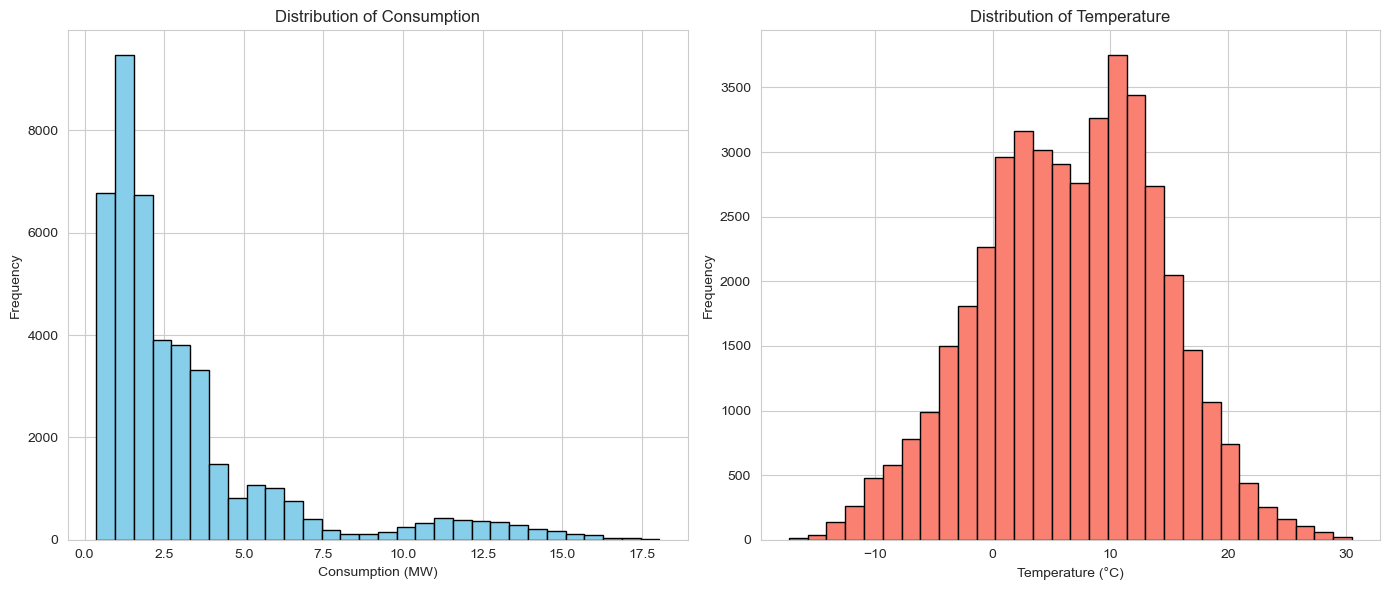

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Basic statistical properties
stats_consumption = df['consumption'].describe()
stats_temperature = df['temperature'].describe()

print("Basic Statistics for Consumption")
display(stats_consumption)

print("\nBasic Statistics for Temperature")
display(stats_temperature)

# Grouped statistical properties by location
grouped_stats_consumption = df.groupby('location')['consumption'].describe()
grouped_stats_temperature = df.groupby('location')['temperature'].describe()

print("\nGrouped Statistics for Consumption by Location")
display(grouped_stats_consumption)

print("\nGrouped Statistics for Temperature by Location")
display(grouped_stats_temperature)

# Visualizing the distribution of 'consumption' and 'temperature'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(df['consumption'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption (MW)')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['temperature'], bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


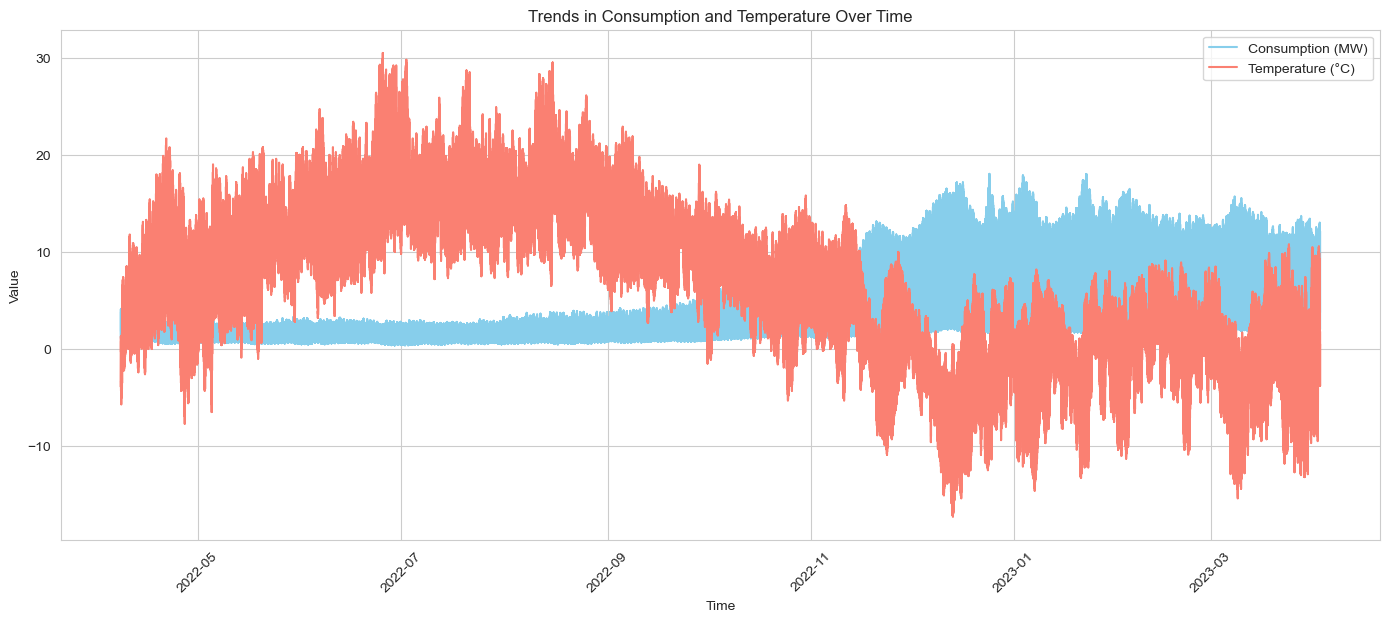

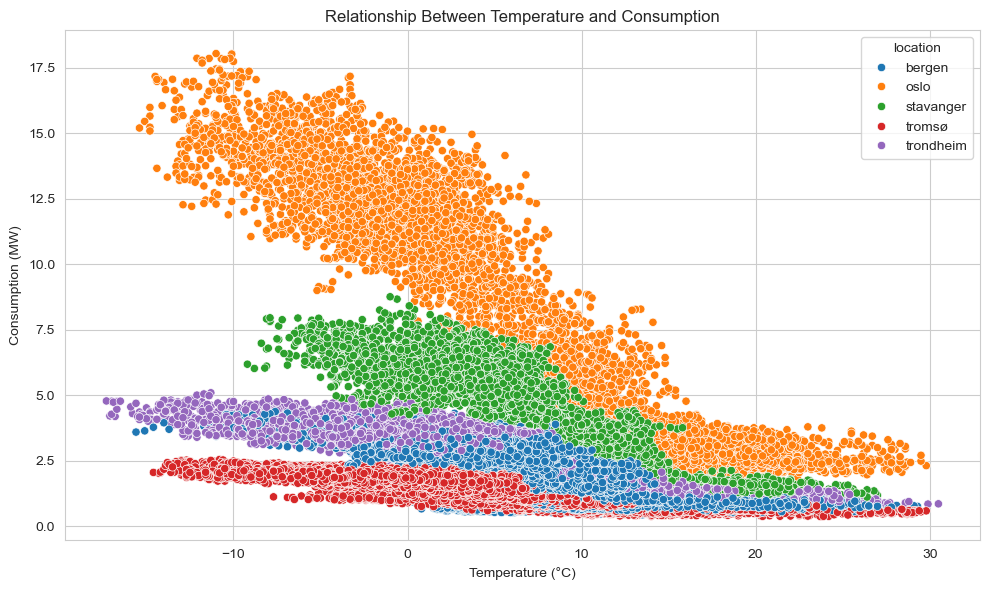

Correlation between Temperature and Consumption: -0.46


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Visualizing trends in consumption and temperature overtimestamp 
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['consumption'], label='Consumption (MW)', color='skyblue')
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)', color='salmon')
plt.title('Trends in Consumption and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Visualizing relationship between temperature and consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature'], y=df['consumption'], hue=df['location'])
plt.title('Relationship Between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption (MW)')
plt.tight_layout()
plt.show()

# Calculating and displaying the correlation between temperature and consumption
correlation = df['temperature'].corr(df['consumption'])
print(f'Correlation between Temperature and Consumption: {correlation:.2f}')


## Modeling